In [1]:
from __future__ import annotations

In [2]:
import pandas


train_val = pandas.read_csv("../data/vn30/GAS_train.csv")
train_val

,time,open,high,low,close,volume
0,2019-01-02,54.33,54.83,54.33,54.77,417520
1,2019-01-03,54.58,54.89,53.00,53.44,404480
2,2019-01-04,52.87,53.95,51.99,53.32,336550
3,2019-01-07,54.58,55.08,53.95,54.45,255840
4,2019-01-08,54.45,55.97,54.45,55.71,600270
...,...,...,...,...,...,...
1245,2023-12-25,67.98,69.80,67.98,69.61,1057401
1246,2023-12-26,69.80,69.80,68.89,69.52,756305
1247,2023-12-27,69.52,69.80,69.25,69.43,707087
1248,2023-12-28,69.52,69.52,68.80,69.16,767974


In [3]:
train_val.drop("time", axis=1, inplace=True)

In [4]:
from utils import extract_xy


CONTEXT_SIZE = 4
train_val_input, train_val_output = extract_xy(train_val, context_size=CONTEXT_SIZE)
train_val_input.shape, train_val_output.shape

((1246, 20), (1246, 5))

In [5]:
train_val_input

,open-1,open-2,open-3,open-4,high-1,high-2,high-3,high-4,low-1,low-2,low-3,low-4,close-1,close-2,close-3,close-4,volume-1,volume-2,volume-3,volume-4
4,54.58,52.87,54.58,54.33,55.08,53.95,54.89,54.83,53.95,51.99,53.00,54.33,54.45,53.32,53.44,54.77,255840.0,336550.0,404480.0,417520.0
5,54.45,54.58,52.87,54.58,55.97,55.08,53.95,54.89,54.45,53.95,51.99,53.00,55.71,54.45,53.32,53.44,600270.0,255840.0,336550.0,404480.0
6,56.60,54.45,54.58,52.87,57.04,55.97,55.08,53.95,56.16,54.45,53.95,51.99,56.72,55.71,54.45,53.32,515500.0,600270.0,255840.0,336550.0
7,57.35,56.60,54.45,54.58,58.17,57.04,55.97,55.08,57.10,56.16,54.45,53.95,57.61,56.72,55.71,54.45,685580.0,515500.0,600270.0,255840.0
8,57.67,57.35,56.60,54.45,57.86,58.17,57.04,55.97,56.85,57.10,56.16,54.45,57.42,57.61,56.72,55.71,338400.0,685580.0,515500.0,600270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,68.16,68.25,68.70,68.25,68.43,68.34,68.70,68.61,67.61,67.70,68.07,67.52,67.98,67.98,68.43,68.25,617722.0,728928.0,574287.0,887468.0
1246,67.98,68.16,68.25,68.70,69.80,68.43,68.34,68.70,67.98,67.61,67.70,68.07,69.61,67.98,67.98,68.43,1057401.0,617722.0,728928.0,574287.0
1247,69.80,67.98,68.16,68.25,69.80,69.80,68.43,68.34,68.89,67.98,67.61,67.70,69.52,69.61,67.98,67.98,756305.0,1057401.0,617722.0,728928.0
1248,69.52,69.80,67.98,68.16,69.80,69.80,69.80,68.43,69.25,68.89,67.98,67.61,69.43,69.52,69.61,67.98,707087.0,756305.0,1057401.0,617722.0


In [6]:
train_val_output

,open,high,low,close,volume
4,54.45,55.97,54.45,55.71,600270
5,56.60,57.04,56.16,56.72,515500
6,57.35,58.17,57.10,57.61,685580
7,57.67,57.86,56.85,57.42,338400
8,57.29,57.29,56.16,56.47,370320
...,...,...,...,...,...
1245,67.98,69.80,67.98,69.61,1057401
1246,69.80,69.80,68.89,69.52,756305
1247,69.52,69.80,69.25,69.43,707087
1248,69.52,69.52,68.80,69.16,767974


In [7]:
from sklearn.model_selection import train_test_split


train_input, val_input, train_output, val_output = train_test_split(
    train_val_input,
    train_val_output,
    train_size=0.8,
    random_state=42,
    shuffle=True,
)
train_input.shape, val_input.shape, train_output.shape, val_output.shape

((996, 20), (250, 20), (996, 5), (250, 5))

In [8]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
val_input_scaled = scaler.transform(val_input)

In [9]:
import random
from typing import List, Tuple, TYPE_CHECKING

import numpy
from sklearn.linear_model import RidgeCV


def sigmoid(x: numpy.ndarray) -> numpy.ndarray:
    return 1 / (1 + numpy.exp(-x))


class EDRVFL:

    __slots__ = ("params", "ridge")
    if TYPE_CHECKING:
        params: List[List[Tuple[numpy.ndarray, numpy.ndarray]]]
        ridge: List[RidgeCV]

    def __init__(self, params: List[List[Tuple[numpy.ndarray, numpy.ndarray]]]) -> None:
        self.params = params
        self.ridge = [RidgeCV() for _ in range(len(params))]

    def transform_input(self, x: numpy.ndarray) -> List[numpy.ndarray]:
        results: List[numpy.ndarray] = []
        for model in self.params:
            h = x
            concat = [x]
            for w, b in model:
                h = sigmoid(h @ w + b)
                concat.append(h)
            
            results.append(numpy.concat(concat, axis=1))

        return results

    def predict(self, x: numpy.ndarray) -> numpy.ndarray:
        s = [ridge.predict(z) for z, ridge in zip(self.transform_input(x), self.ridge)]
        return sum(s) / len(s)

    def fit(self, x: numpy.ndarray, y: numpy.ndarray) -> None:
        for z, ridge in zip(self.transform_input(x), self.ridge):
            ridge.fit(z, y)

    @classmethod
    def random(cls, input_size: int) -> EDRVFL:
        rng = numpy.random.default_rng(42)
        random.seed(42)

        models_count = 8
        model_layers_count = [random.randint(1, 10) for _ in range(models_count)]
        model_hidden_sizes = [[random.randint(32, 64) for _ in range(model_layers_count[i])] for i in range(models_count)]

        results: List[List[Tuple[numpy.ndarray, numpy.ndarray]]] = [[] for _ in range(models_count)]
        for model in range(models_count):
            last_size = input_size
            for hidden_size in model_hidden_sizes[model]:
                w = rng.random((last_size, hidden_size))
                b = rng.random((1, hidden_size))
                last_size = hidden_size

                results[model].append((w, b))

        return cls(results)

In [10]:
model = EDRVFL.random(train_input_scaled.shape[1])
for param in model.params:
    print(", ".join(str((w.shape, b.shape)) for w, b in param))

((20, 37), (1, 37)), ((37, 59), (1, 59))
((20, 34), (1, 34))
((20, 33), (1, 33)), ((33, 37), (1, 37)), ((37, 45), (1, 45)), ((45, 46), (1, 46)), ((46, 64), (1, 64))
((20, 33), (1, 33)), ((33, 44), (1, 44)), ((44, 58), (1, 58)), ((58, 46), (1, 46))
((20, 60), (1, 60)), ((60, 49), (1, 49)), ((49, 32), (1, 32)), ((32, 42), (1, 42))
((20, 59), (1, 59)), ((59, 53), (1, 53)), ((53, 49), (1, 49))
((20, 41), (1, 41)), ((41, 45), (1, 45))
((20, 53), (1, 53)), ((53, 38), (1, 38)), ((38, 37), (1, 37)), ((37, 56), (1, 56)), ((56, 38), (1, 38)), ((38, 54), (1, 54)), ((54, 54), (1, 54)), ((54, 48), (1, 48)), ((48, 34), (1, 34))


In [11]:
from utils import metrics


model.fit(train_input_scaled, train_output)
metrics(train_output, model.predict(train_input_scaled))

{'rmse': 68277.61442667601,
 'mape': 0.09498751246081713,
 'r2': 0.9076340135626972}

In [12]:
rmse: List[float] = []
mape: List[float] = []
r2: List[float] = []

for context_size in range(1, 21):
    train_val_input, train_val_output = extract_xy(train_val, context_size=context_size)
    train_input, val_input, train_output, val_output = train_test_split(
        train_val_input,
        train_val_output,
        train_size=0.8,
        random_state=42,
        shuffle=True,
    )

    scaler = StandardScaler()
    train_input_scaled = scaler.fit_transform(train_input)
    val_input_scaled = scaler.transform(val_input)

    model = EDRVFL.random(train_input_scaled.shape[1])
    model.fit(train_input_scaled, train_output)

    m = metrics(val_output, model.predict(val_input_scaled))

    rmse.append(m["rmse"])
    mape.append(m["mape"])
    r2.append(m["r2"])


def sort_metrics(metrics: List[float], *, reverse: bool = False) -> List[float]:
    return sorted(enumerate(metrics, start=1), key=lambda x: x[1], reverse=reverse)


print(sort_metrics(rmse, reverse=False))
print(sort_metrics(mape, reverse=False))
print(sort_metrics(r2, reverse=True))

[(8, 59563.014536072835), (9, 60653.84097872125), (19, 63808.39187843319), (14, 67831.15429342964), (15, 68075.94722638195), (20, 69056.96346001756), (5, 69179.25599527288), (1, 70870.52976915328), (2, 72152.45809539226), (12, 72741.1053636889), (3, 73388.7148839062), (7, 75304.38144717857), (17, 78156.50436632536), (18, 79268.16352591112), (10, 81039.06900774609), (4, 81477.5185471918), (13, 83410.15686748698), (16, 83467.55035945275), (11, 83874.3300987252), (6, 85042.80526149082)]
[(7, 0.08695575095862428), (8, 0.08954693669637165), (15, 0.09004165232687376), (5, 0.0907688650473133), (12, 0.09077229258598277), (9, 0.0910822906005459), (10, 0.09188967008374536), (18, 0.09320744875386955), (4, 0.09363039741714545), (17, 0.09498259863389241), (19, 0.09564466586277978), (14, 0.09728589023398869), (3, 0.0974995887021777), (11, 0.09816829002535597), (16, 0.0982648922530329), (6, 0.10122744712361784), (13, 0.10215443154636113), (20, 0.10239254995653128), (2, 0.10285157419877503), (1, 0.108

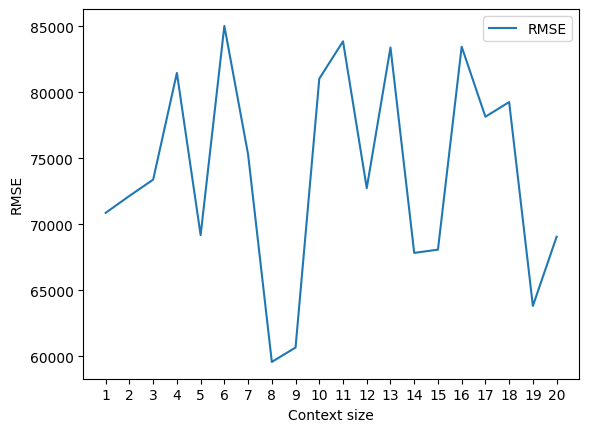

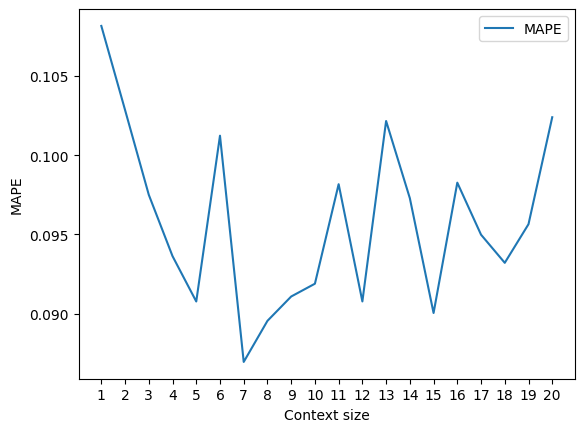

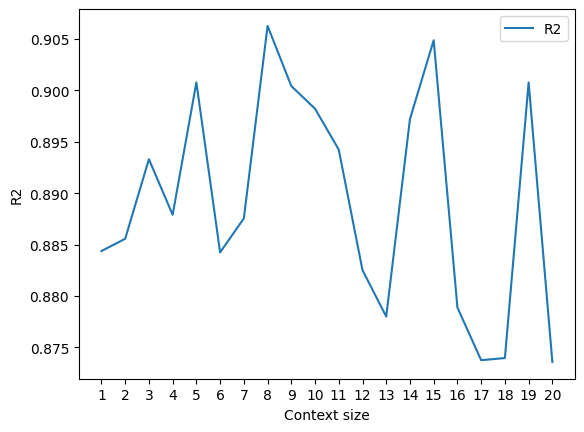

In [13]:
from utils import plot_context_size_metrics


plot_context_size_metrics(rmse, label="RMSE")
plot_context_size_metrics(mape, label="MAPE")
plot_context_size_metrics(r2, label="R2")

In [14]:
CONTEXT_SIZE = 8
train_val_input, train_val_output = extract_xy(train_val, context_size=CONTEXT_SIZE)
train_input, val_input, train_output, val_output = train_test_split(
    train_val_input,
    train_val_output,
    train_size=0.8,
    random_state=42,
    shuffle=True,
)

scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)
val_input_scaled = scaler.transform(val_input)

model = EDRVFL.random(train_input_scaled.shape[1])
model.fit(train_input_scaled, train_output)
metrics(val_output, model.predict(val_input_scaled))

{'rmse': 59563.014536072835,
 'mape': 0.08954693669637165,
 'r2': 0.9062646012426393}

In [15]:
test = pandas.read_csv("../data/vn30/GAS_test.csv")
test.drop("time", axis=1, inplace=True)
test_input, test_output = extract_xy(test, context_size=CONTEXT_SIZE)

test_input_scaled = scaler.transform(test_input)
metrics(test_output, model.predict(test_input_scaled))

{'rmse': 107613.01410092929,
 'mape': 0.09905461673662513,
 'r2': 0.8296670199077179}